# The Neural Network Structure and its Formulas
these are the same as the first part of the presentation. The main things to focus on here are these 3 functions:

1. sigmoid_activation_function

![alt text](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fspiyer99.github.io%2Fimages%2Fpytorch_recommendation%2Fsigmoid1.png&f=1&nofb=1)

2. forward_propagation

![alt text](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fs3-ap-southeast-1.amazonaws.com%2Fkipalog.com%2F2abl6qud09_image.png&f=1&nofb=1)
![alt text](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn-images-1.medium.com%2Fmax%2F1600%2F1*tp73P0isrrfpj8RG-5aH6w.png&f=1&nofb=1)

3. back_propagation

![alt text](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fpantelis.github.io%2Fcs634%2Fdocs%2Fcommon%2Flectures%2Fdnn%2Fbackprop-intro%2Fimages%2Fbackprop-template.png&f=1&nofb=1)
![alt text](https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.adeveloperdiary.com%2Fwp-content%2Fuploads%2F2019%2F04%2FUnderstand-and-Implement-the-Backpropagation-Algorithm-From-Scratch-In-Python-adeveloperdiary.com-4.jpg&f=1&nofb=1)

In [1]:
import numpy as np

class NeuralNetwork:
    def __init__(self, *layers_sizes, name='Neural Network'):
        self.layers = [np.zeros((size, 1)) for size in layers_sizes]
        self.weights = [self.weight_init(layers_sizes[i+1], layers_sizes[i]) for i in range(len(layers_sizes)-1)]
        self.biases = [np.zeros((size, 1)) for size in layers_sizes[1:]]
        self.NAME = name
        
    def __repr__(self):
        representation = 'network:\n'
        for layer in self.layers:
            representation += str(layer.shape[0]) + ' -> '
        representation = representation[:-4] + '\n\n'
        
        representation += '\n\nweights:\n'
        for weight_layer in self.weights:
            representation += str(weight_layer) + '\n\n'
            
        representation += '\n\nbiases:\n'
        for bias_layer in self.biases:
            representation += str(bias_layer) + '\n\n'
            
        return representation[:-2]
    
    def weight_init(self, y, x):
        return np.random.uniform(-0.5, 0.5, (y, x))
    
    def sigmoid_activation_function(self, layer):
        return 1 / (1 + np.exp(layer))
    
    def forward_propagation(self, input_layer):
        self.layers[0] = input_layer
        for i in range(1, len(self.layers)):
            self.layers[i] = self.biases[i-1] + self.weights[i-1] @ self.layers[i-1]
            self.layers[i] = self.sigmoid_activation_function(-self.layers[i])
        return self.layers[-1]
    
    def back_propagation(self, output, label, alpha):
        for i in range(-1, -(len(self.weights)+1), -1):
            if i == -1:
                delta = output - label
            else:
                delta = self.weights[i+1].T @ delta * (self.layers[i] * (1 - self.layers[i]))
            self.weights[i] += -alpha * delta @ self.layers[i-1].T
            self.biases[i] += -alpha * delta
    
    def learn(self, training_data, training_labels, epochs, alpha):
        total = len(training_data)
        for epoch in range(epochs):
            num_correct = 0
            for data, label in zip(training_data, training_labels):
                data.shape = (data.shape[0], 1)
                label.shape = (label.shape[0], 1)
                
                output = self.forward_propagation(data)
                self.back_propagation(output, label, alpha)
                
                num_correct += int(np.argmax(output) == np.argmax(label))
            
            print(f'epoch {epoch+1}: {num_correct} out of {total} correct')
        print(f'Done training {self.NAME}!')
        
    def test_set(self, test_data, test_labels):
        num_correct = 0
        for data, label in zip(test_data, test_labels):
            data.shape = (data.shape[0], 1)
            label.shape = (label.shape[0], 1)
            
            output = self.forward_propagation(data)
            num_correct += int(np.argmax(output) == np.argmax(label))
            
        print('{}\'s score: {:.2f}%'.format(self.NAME, num_correct/len(test_data)*100))
        
    def test_single(self, data, label):
        print(f'guess: {NN.forward_propagation(image).argmax()}\nanswer: {test_labels[index].argmax()}')

# Loading and Formatting the Handwritten Number Images

In [2]:
with np.load(f'data/mnist.npz') as f:
    training_images = f['x_train'].astype('float32') / 255    # loading and regularizing
    new_y, new_x = training_images.shape[0], training_images.shape[1] * training_images.shape[2]
    training_images = np.reshape(training_images, (new_y, new_x))    # making each 2D image array into a 1D array
    
    training_labels = f['y_train']
    training_labels = np.eye(10)[training_labels]    # shortcut to one hot encoding the labels
    
    test_images = f['x_test'].astype('float32') / 255    # repeating the previous steps for the test data
    new_y, new_x = test_images.shape[0], test_images.shape[1] * test_images.shape[2]
    test_images = np.reshape(test_images, (new_y, new_x))
    
    test_labels = f['y_test']
    test_labels = np.eye(10)[test_labels]

# Instantiating and Training a Neural Network

In [3]:
NN = NeuralNetwork(784, 20, 10)
# DNN = NeuralNetwork(784, 100, 20, 10, name='Deep Neural Network')
# HNN = NeuralNetwork(784, 200, 100, 20, 10, name='Huge Neural Network')
# GNN = NeuralNetwork(784, 300, 200, 100, 20, 10, name='Gigantic Neural Network')

NN.learn(training_images, training_labels, 3, 0.01)
# print()
# DNN.learn(training_images, training_labels, 3, 0.01)
# print()
# HNN.learn(training_images, training_labels, 3, 0.01)
# print()
# GNN.learn(training_images, training_labels, 3, 0.01)

epoch 1: 51505 out of 60000 correct
epoch 2: 55437 out of 60000 correct
epoch 3: 56093 out of 60000 correct
Done training Neural Network!


# Testing the Neural Network's General Performance

In [4]:
NN.test_set(test_images, test_labels)
# DNN.test_set(test_images, test_labels)
# HNN.test_set(test_images, test_labels)
# GNN.test_set(test_images, test_labels)

Neural Network's score: 93.35%


# Specific Example of the Neural Network Process

guess: 5
answer: 5


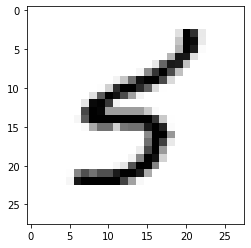


First, the middle 10, and last neuron output values in input layer:
[0.] ... [0.07058824] [0.72156864] [0.99607843] [0.99607843] [0.99607843] [0.99607843] [0.99607843] [0.99607843] [0.99607843] [0.99607843] ... [0.]

First, the middle 10, and last neuron output values in hidden layer:
[0.12866207] ... [0.96050696] [0.00209087] [0.66195878] [0.68257286] [0.99283432] [0.43392281] [0.00721063] [0.00747898] [0.99349854] [8.28922857e-06] ... [0.99349577]

All neuron output values in output layer:
[2.74889074e-05] [0.00673827] [3.60209233e-05] [0.00072694] [0.05762584] [0.34988172] [0.00697652] [1.30169482e-05] [1.34359093e-05] [0.04593888]


In [110]:
import matplotlib.pyplot as plt

index = np.random.randint(len(test_images))
image, label = test_images[index], test_labels[index]

plt.imshow(image.reshape(28, 28), cmap='Greys')

image.shape = (image.shape[0], 1)
NN.test_single(image, label)
plt.show()

print('\nFirst, the middle 10, and last neuron output values in input layer:')
print(f'{NN.layers[0][0]} ... {NN.layers[0][398]} {NN.layers[0][399]} {NN.layers[0][400]} {NN.layers[0][401]} {NN.layers[0][402]} {NN.layers[0][403]} {NN.layers[0][404]} {NN.layers[0][405]} {NN.layers[0][406]} {NN.layers[0][407]} ... {NN.layers[0][783]}')
print('\nFirst, the middle 10, and last neuron output values in hidden layer:')
print(f'{NN.layers[1][0]} ... {NN.layers[1][5]} {NN.layers[1][6]} {NN.layers[1][7]} {NN.layers[1][8]} {NN.layers[1][9]} {NN.layers[1][10]} {NN.layers[1][11]} {NN.layers[1][12]} {NN.layers[1][13]} {NN.layers[1][14]} ... {NN.layers[1][19]}')
print('\nAll neuron output values in output layer:')
print(f'{NN.layers[2][0]} {NN.layers[2][1]} {NN.layers[2][2]} {NN.layers[2][3]} {NN.layers[2][4]} {NN.layers[2][5]} {NN.layers[2][6]} {NN.layers[2][7]} {NN.layers[2][8]} {NN.layers[2][9]}')

![alt text](images/example_model.png)